# Jupiter's Notebook for Scenario 04
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-04-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(306189, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 305991, 1: 198})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    306189
srcIP                  11689
srcPrt                 55439
dstIP                  10472
dstPrt                   253
flowduration          187275
total_fpackets           757
total_bpackets           955
total_fpktl             8786
total_bpktl            17519
min_fpktl                129
min_bpktl                496
max_fpktl               1295
max_bpktl                952
mean_fpktl             16481
mean_bpktl             20690
std_fpktl              27150
std_bpktl              25898
total_fipt             76284
total_bipt             59794
min_fipt               41025
min_bipt               20208
max_fipt               74006
max_bipt               54941
mean_fipt              73547
mean_bipt              58506
std_fipt               60371
std_bipt               52206
fpsh_cnt                 152
bpsh_cnt                 396
furg_cnt                   1
burg_cnt                   1
total_fhlen             3197
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(306189, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(306189, 49)
(303784, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,12686,25,0.000014,1,1,62,54,62,54,62,54,62.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,28,20,71089.898438,71089.898438,142179.796875,8.246428e+06,58.000000,5.656854,0.000014,0.000000,0,1,1,1,0,0,0,0.870968,0
1,TCP,59694,80,8.593100,6,5,923,502,60,54,621,278,153.833328,100.400002,228.865398,99.341837,8.593081,8.593082,0.013070,0.010200,4.817206,5.009996,1.718616,2.148271,2.289094,2.529849,1,1,0,0,128,108,0.698235,0.581862,1.280097,1.658307e+02,129.545455,175.829102,1.340874,2.130220,2,2,0,10,0,0,0,0.543879,0
2,TCP,54641,80,1.518976,7,6,682,2313,66,66,278,1434,97.428574,385.500000,79.680313,556.319243,1.518976,1.160217,0.000023,0.000013,0.798060,0.440399,0.253163,0.232043,0.319965,0.214336,1,1,0,0,232,204,4.608368,3.950030,8.558397,1.971723e+03,230.384615,393.028290,0.163290,0.264648,2,2,0,12,0,0,0,3.391496,0
3,TCP,11449,25,1.114772,3,3,186,162,62,54,62,54,62.000000,54.000000,0.000000,0.000000,1.114754,1.114762,0.458319,0.458329,0.656435,0.656433,0.557377,0.557381,0.140089,0.140081,0,0,0,0,84,60,2.691133,2.691133,5.382266,3.121714e+02,58.000000,4.381781,0.222960,0.313212,0,3,3,3,0,0,0,0.870968,0
4,TCP,59695,80,14.950082,8,6,1676,1212,60,54,660,710,209.500000,202.000000,276.208513,264.254423,14.950082,7.263925,0.012383,0.004338,7.674953,5.003805,2.135726,1.452785,3.010411,2.200873,2,2,0,0,168,128,0.535114,0.401336,0.936450,1.931762e+02,206.285714,260.677063,1.519740,2.568937,1,2,1,13,0,0,0,0.723150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306184,UDP,62204,53,0.270114,1,1,78,78,78,78,78,78,78.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,44,3.702141,3.702141,7.404283,5.775341e+02,78.000000,0.000000,0.270114,0.000000,0,0,0,0,0,0,0,1.000000,0
306185,UDP,28571,53,0.000281,1,1,74,166,74,166,74,166,74.000000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,132,3560.529785,3560.529785,7121.059570,8.545271e+05,120.000000,65.053825,0.000281,0.000000,0,0,0,0,0,0,0,2.243243,0
306186,UDP,62218,53,0.000000,1,0,72,0,72,0,72,0,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,0,0.000000,0.000000,0.000000,0.000000e+00,72.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
306187,UDP,62219,53,0.000000,1,0,78,0,78,0,78,0,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,0,0.000000,0.000000,0.000000,0.000000e+00,78.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 303587 of 303784 (99.9%)
> Class 1 : 197 of 303784 (0.1%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((243027, 48), (60757, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
276663,0.000085,1.110137e-05,0.000009,0.000157,1,1,85,136,85,136,85,136,85.000000,136.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,102,6364.649414,6364.649414,12729.298828,1.406588e+06,110.500000,36.062447,0.000157,0.000000,0,0,0,0,0,0,0,1.600000
1742,0.004191,2.927198e-05,0.000370,5.179779,24,24,1973,27273,66,66,447,1434,82.208336,1136.375,77.717424,547.202274,5.179779,5.179758,0.000012,0.000008,4.826879,4.833369,0.225208,0.225207,1.003666,1.005084,1,4,0,0,776,780,4.633402,4.633402,9.266805,5.646187e+03,609.291667,658.189392,0.212943,0.974687,2,2,0,47,0,0,0,13.823112
128139,0.000085,1.526141e-06,0.000009,3.464763,1,1,78,165,78,165,78,165,78.000000,165.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,131,0.288620,0.288620,0.577240,7.013467e+01,121.500000,61.518291,3.464763,0.000000,0,0,0,0,0,0,0,2.115385
250078,0.000085,2.927198e-05,0.000009,2.492490,1,1,77,77,77,77,77,77,77.000000,77.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,0.401205,0.401205,0.802410,6.178560e+01,77.000000,0.000000,2.492490,0.000000,0,0,0,0,0,0,0,1.000000
156656,0.000085,4.130930e-06,0.000009,0.000450,1,1,81,368,81,368,81,368,81.000000,368.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,334,2222.736572,2222.736572,4445.473145,9.980088e+05,224.500000,202.939651,0.000450,0.000000,0,0,0,0,0,0,0,4.543210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120616,0.000085,1.110137e-05,0.000009,7.491007,1,1,76,158,76,158,76,158,76.000000,158.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,42,124,0.133493,0.133493,0.266987,3.123746e+01,117.000000,57.982758,7.491007,0.000000,0,0,0,0,0,0,0,2.078947
261043,0.000085,5.623148e-07,0.000009,0.898636,1,1,83,330,83,330,83,330,83.000000,330.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,49,296,1.112797,1.112797,2.225595,4.595854e+02,206.500000,174.655380,0.898636,0.000000,0,0,0,0,0,0,0,3.975904
132766,0.000085,5.623148e-07,0.000009,0.000265,1,1,72,164,72,164,72,164,72.000000,164.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,130,3771.856201,3771.856201,7543.712402,8.901581e+05,118.000000,65.053825,0.000265,0.000000,0,0,0,0,0,0,0,2.277778
147818,0.000085,1.110137e-05,0.000009,1.584262,1,1,78,454,78,454,78,454,78.000000,454.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,420,0.631209,0.631209,1.262418,3.358031e+02,266.000000,265.872162,1.584262,0.000000,0,0,0,0,0,0,0,5.820513


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
184211,0.000085,1.110137e-05,0.000009,8.869140,1,1,65,377,65,377,65,377,65.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,31,343,0.112751,0.112751,0.225501,4.983572e+01,221.0,220.617310,8.869140,0.000000,0,0,0,0,0,0,0,5.800000
251384,0.000085,1.526141e-06,0.000009,0.000201,1,1,74,138,74,138,74,138,74.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,40,104,4975.449707,4975.449707,9950.899414,1.054795e+06,106.0,45.254833,0.000201,0.000000,0,0,0,0,0,0,0,1.864865
47615,0.000085,0.000000e+00,0.000009,2.080990,2,2,176,218,87,94,89,124,88.000000,109.000000,1.414214,21.213203,1.885896,1.885538,1.885896,1.885538,1.885896,1.885538,1.885896,1.885538,0.00000,0.000000,0,0,0,0,108,150,0.961081,0.961081,1.922162,1.893330e+02,98.5,17.253019,0.758814,0.976082,0,0,0,0,0,0,0,1.238636
71252,0.000085,1.659948e-04,0.000009,0.189192,1,1,74,74,74,74,74,74,74.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,40,40,5.285634,5.285634,10.571268,7.822739e+02,74.0,0.000000,0.189192,0.000000,0,0,0,0,0,0,0,1.000000
80679,0.000085,4.130930e-06,0.000009,0.000288,1,1,77,189,77,189,77,189,77.000000,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,43,155,3472.105957,3472.105957,6944.211914,9.235802e+05,133.0,79.195961,0.000288,0.000000,0,0,0,0,0,0,0,2.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149416,0.000085,5.623148e-07,0.000009,2.154643,1,1,77,77,77,77,77,77,77.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,43,43,0.464114,0.464114,0.928228,7.147356e+01,77.0,0.000000,2.154643,0.000000,0,0,0,0,0,0,0,1.000000
231098,0.000085,2.927198e-05,0.000009,0.000302,1,1,66,66,66,66,66,66,66.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,32,32,3310.421387,3310.421387,6620.842773,4.369756e+05,66.0,0.000000,0.000302,0.000000,0,0,0,0,0,0,0,1.000000
143182,0.000085,0.000000e+00,0.000009,0.607321,1,1,93,195,93,195,93,195,93.000000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,0,0,0,59,161,1.646576,1.646576,3.293151,4.742138e+02,144.0,72.124893,0.607321,0.000000,0,0,0,0,0,0,0,2.096774
14919,0.004191,2.802026e-08,0.000370,6.046401,9,11,1078,8928,60,54,592,1434,119.777779,811.636353,177.094451,715.134000,6.046394,6.046384,0.003346,0.000007,4.316473,4.311941,0.755799,0.604638,1.45309,1.323535,1,3,0,0,192,232,1.488489,1.819264,3.307753,1.654869e+03,500.3,638.026306,0.523668,1.274822,2,2,0,19,0,0,0,8.282003


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.385884,-0.049618,-0.025982,-0.066477,-0.025686,-0.058288,-0.023434,-0.053674,0.209826,-0.044488,-0.299637,-0.361583,-0.133094,-0.319456,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002445,-0.025452,0.621291,0.740230,0.702426,1.067612,-0.317747,-0.412707,-0.388278,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.250275
1,2.591454,-0.048176,-0.007942,-0.034685,0.062658,0.104815,0.026961,0.109837,-0.747833,-0.756447,2.017672,3.122572,-0.212926,3.667405,1.004275,3.183606,-0.025350,-0.013902,-0.166943,-0.097162,0.099984,0.147124,-0.200672,-0.133094,0.008510,0.023263,-0.004474,0.021084,0.0,0.0,-0.000744,0.034666,-0.284725,-0.317560,-0.311520,-0.449452,2.979958,3.410115,-0.349123,-0.050714,2.821734,2.414344,-0.157941,0.152988,0.0,-0.007027,-0.002028,2.436993
2,-0.385884,-0.050379,-0.025982,-0.045212,-0.025686,-0.058288,-0.023621,-0.053499,-0.142996,0.250467,-0.344447,-0.283740,-0.333269,-0.203880,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002462,-0.022881,-0.285344,-0.318282,-0.312213,-0.455490,-0.245022,-0.256287,0.249236,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.136967
3,-0.385884,-0.048176,-0.025982,-0.051179,-0.025686,-0.058288,-0.023647,-0.054030,-0.193399,-0.644567,-0.350849,-0.519953,-0.361865,-0.554593,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002464,-0.030684,-0.285328,-0.318264,-0.312195,-0.455499,-0.539229,-0.634302,0.070331,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.382186
4,-0.385884,-0.050172,-0.025982,-0.066475,-0.025686,-0.058288,-0.023541,-0.052276,0.008213,2.315148,-0.325243,0.261163,-0.247480,0.605149,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002455,-0.004881,0.031255,0.051352,0.042101,0.625167,0.435951,0.612714,-0.388224,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,0.396794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243022,-0.385884,-0.049618,-0.025982,-0.020499,-0.025686,-0.058288,-0.023674,-0.053542,-0.243802,0.179271,-0.357250,-0.302529,-0.390462,-0.231778,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002467,-0.023501,-0.285366,-0.318308,-0.312238,-0.455532,-0.274773,-0.278012,0.990096,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.144978
243023,-0.385884,-0.050455,-0.025982,-0.060962,-0.025686,-0.058288,-0.023487,-0.052505,0.109020,1.928656,-0.312440,0.159161,-0.190287,0.453705,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002450,-0.008250,-0.285226,-0.318145,-0.312082,-0.455068,0.316946,0.438914,-0.222951,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,0.272071
243024,-0.385884,-0.050455,-0.025982,-0.066476,-0.025686,-0.058288,-0.023781

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.385884,-0.049618,-0.025982,-0.012041,-0.025686,-0.058288,-0.023968,-0.052222,-0.798236,2.406686,-0.427666,0.285321,-0.705022,0.641017,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002492,-0.004083,-0.285369,-0.318312,-0.312241,-0.455512,0.412811,0.721339,1.243683,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,0.673101
1,-0.385884,-0.050379,-0.025982,-0.066477,-0.025686,-0.058288,-0.023727,-0.053662,-0.344608,-0.024146,-0.370053,-0.356214,-0.447654,-0.311485,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002471,-0.025275,0.423393,0.509180,0.480953,0.686660,-0.347499,-0.356222,-0.388270,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.192044
2,-0.385884,-0.050500,-0.025982,-0.053705,-0.021845,-0.051196,-0.021005,-0.053180,0.310632,-0.471663,-0.274032,-0.393794,-0.047305,-0.427061,-0.281502,-0.194041,-0.045593,-0.040162,0.134272,0.253915,-0.131940,-0.067951,0.026489,0.116153,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002312,-0.021196,-0.285248,-0.318170,-0.312106,-0.455361,-0.397084,-0.528286,-0.248679,-0.050418,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.329721
3,-0.385884,-0.037321,-0.025982,-0.065317,-0.025686,-0.058288,-0.023727,-0.054048,-0.344608,-0.675080,-0.370053,-0.528006,-0.447654,-0.566549,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002471,-0.030950,-0.284632,-0.317451,-0.311416,-0.454719,-0.559063,-0.634302,-0.353494,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.382186
4,-0.385884,-0.050172,-0.025982,-0.066476,-0.025686,-0.058288,-0.023647,-0.053355,-0.193399,0.494567,-0.350849,-0.219318,-0.361865,-0.108232,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002464,-0.020753,0.209234,0.259146,0.241282,0.544569,-0.168991,-0.147662,-0.388254,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.062402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60752,-0.385884,-0.050455,-0.025982,-0.053253,-0.025686,-0.058288,-0.023647,-0.054030,-0.193399,-0.644567,-0.350849,-0.519953,-0.361865,-0.554593,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002464,-0.030684,-0.285319,-0.318253,-0.312185,-0.455489,-0.539229,-0.634302,0.008164,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.382186
60753,-0.385884,-0.048176,-0.025982,-0.066476,-0.025686,-0.058288,-0.023941,-0.054096,-0.747833,-0.756447,-0.421264,-0.549480,-0.676426,-0.598432,-0.305333,-0.330261,-0.057182,-0.055192,-0.166945,-0.097163,-0.280660,-0.205521,-0.231477,-0.166902,-0.218551,-0.185957,-0.020118,-0.032832,0.0,0.0,-0.002490,-0.031659,0.186201,0.232255,0.215505,0.017630,-0.611954,-0.634302,-0.388251,-0.257434,-0.338366,-0.361394,-0.157941,-0.054840,0.0,-0.007027,-0.002028,-0.382186
60754,-0.385884,-0.050500,-0.025982,-0.062750,-0.02568

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'flow_ece', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((243027, 45), (60757, 45))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)

In [33]:
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.1min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.996 total time= 2.4min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.996 total time= 1.7min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 1.8min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.996 total time= 1.6min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.4min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 2.4min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.8min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 2.3min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 2.1min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.996 total time= 2.9min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [34]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.996440727909718


In [35]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60710
     class 1       0.13      0.85      0.22        47

    accuracy                           1.00     60757
   macro avg       0.56      0.92      0.61     60757
weighted avg       1.00      1.00      1.00     60757



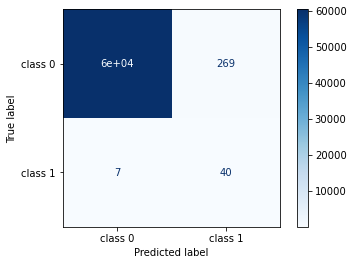

In [36]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [38]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 242877, 1: 150})
Resample dataset shape: Counter({0: 242877, 1: 242877})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [39]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=GridSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)
model2.fit(X_smote,y_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 2.8min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 2.9min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.994 total time= 2.8min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.994 total time= 2.8min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.994 total time= 2.9min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 4.3min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 4.3min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 4.4min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 4.4min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 4.4min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.998 total time= 6.0min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9988059802147113
Best Model: LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='saga')


In [41]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60710
     class 1       0.19      0.81      0.31        47

    accuracy                           1.00     60757
   macro avg       0.59      0.90      0.65     60757
weighted avg       1.00      1.00      1.00     60757



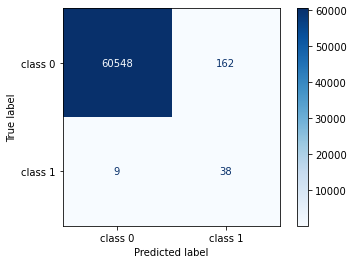

In [42]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-SVM)

In [43]:
#Run grid search only on training set using cross-validation
parameters = {'criterion':['gini','entropy'], 'max_depth' : [2,4,6,8,10,12]}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.995 total time=   0.7s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.7s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.7s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.998 total time=   0.7s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.6s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   1.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   1.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   1.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   0.7s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   1.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=1.000 total time=   1.0s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [44]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
accuracy : 0.9999300490261855
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)


In [45]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60710
     class 1       0.93      0.89      0.91        47

    accuracy                           1.00     60757
   macro avg       0.97      0.95      0.96     60757
weighted avg       1.00      1.00      1.00     60757



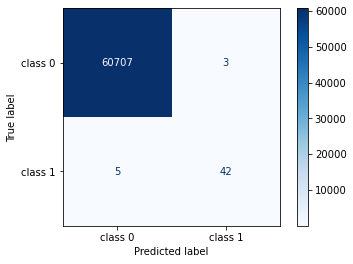

In [46]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [48]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [49]:
# define the undersampling method
oss = OneSidedSelection(random_state=0)
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)

Counter({0: 21463, 1: 150})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [60]:
#Run grid search only on training set using cross-validation
parameters = {'C':[1, 5, 10],'gamma':[0.1, 1]}
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='poly'), parameters, cv=5,verbose=3)
model4.fit(X_oss, y_oss)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.999 total time=   0.6s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.999 total time=   0.4s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.999 total time=   0.2s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.999 total time=   1.2s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.998 total time=   1.0s
[CV 1/5] END ......................C=1, gamma=1;, score=0.999 total time=   0.4s
[CV 2/5] END ......................C=1, gamma=1;, score=0.999 total time=   0.4s
[CV 3/5] END ......................C=1, gamma=1;, score=0.999 total time=   0.8s
[CV 4/5] END ......................C=1, gamma=1;, score=0.999 total time=   1.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.998 total time=   1.4s
[CV 1/5] END ....................C=5, gamma=0.1;, score=0.999 total time=   0.5s
[CV 2/5] END ....................C=5, gamma=0.1;,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', kernel='poly'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.1, 1]}, verbose=3)

In [61]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1}
accuracy : 0.9989358170833386
Best Model: SVC(C=1, class_weight='balanced', gamma=0.1, kernel='poly')


In [62]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60710
     class 1       0.87      0.85      0.86        47

    accuracy                           1.00     60757
   macro avg       0.93      0.93      0.93     60757
weighted avg       1.00      1.00      1.00     60757



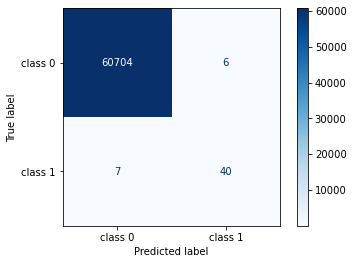

In [63]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [64]:
#Run grid search only on training set using cross-validation
parameters = {'max_depth': [4, 15, 30],'n_estimators': [50, 100, 180, 700], 'learning_rate': [0.1, 0.01, 0.05]}
model5 = GridSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False), parameters, cv=5, verbose=3)
model5.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=1.000 total time=   1.8s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=1.000 total time=   1.5s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=1.000 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=1.000 total time=   1.4s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=1.000 total time=   1.5s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=1.000 total time=   2.8s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=1.000 total time=   2.8s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=1.000 total time=   2.8s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=1.000 total time=   3.3s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=1.000 total time= 

[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=100;, score=1.000 total time=   4.0s
[CV 3/5] END learning_rate=0.01, max_depth=15, n_estimators=100;, score=1.000 total time=   3.6s
[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=100;, score=1.000 total time=   3.9s
[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=100;, score=1.000 total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=180;, score=1.000 total time=   6.9s
[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=180;, score=1.000 total time=   8.5s
[CV 3/5] END learning_rate=0.01, max_depth=15, n_estimators=180;, score=1.000 total time=   8.1s
[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=180;, score=1.000 total time=   7.1s
[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=180;, score=1.000 total time=   7.3s
[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=700;, score=1.000 total time=  23.8s
[CV 2/5] END learning_rate=0.0

[CV 2/5] END learning_rate=0.05, max_depth=30, n_estimators=180;, score=1.000 total time=   5.9s
[CV 3/5] END learning_rate=0.05, max_depth=30, n_estimators=180;, score=1.000 total time=   5.8s
[CV 4/5] END learning_rate=0.05, max_depth=30, n_estimators=180;, score=1.000 total time=   5.7s
[CV 5/5] END learning_rate=0.05, max_depth=30, n_estimators=180;, score=1.000 total time=   5.9s
[CV 1/5] END learning_rate=0.05, max_depth=30, n_estimators=700;, score=1.000 total time=  13.4s
[CV 2/5] END learning_rate=0.05, max_depth=30, n_estimators=700;, score=1.000 total time=  13.8s
[CV 3/5] END learning_rate=0.05, max_depth=30, n_estimators=700;, score=1.000 total time=  13.7s
[CV 4/5] END learning_rate=0.05, max_depth=30, n_estimators=700;, score=1.000 total time=  14.0s
[CV 5/5] END learning_rate=0.05, max_depth=30, n_estimators=700;, score=1.000 total time=  14.1s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

In [65]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("accuracy :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 180}
accuracy : 0.999967081999251
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [66]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60710
     class 1       0.81      0.28      0.41        47

    accuracy                           1.00     60757
   macro avg       0.91      0.64      0.71     60757
weighted avg       1.00      1.00      1.00     60757



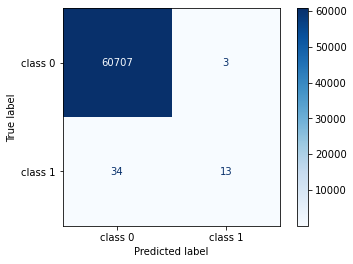

In [67]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [68]:
#save notebook session
import dill
dill.dump_session('session_esc-04.db')
#to restore a notebook session
#dill.load_session('session_esc-04.db')